<center><h1>NeuroM Tutorial</h1></center>


In [1]:
%matplotlib inline
# upgrade neurom
!pip install --upgrade neurom # ! in order to write in the terminal

import pylab as plt
import neurom as nm

/home/hbpschool2016/local/pythonenv/local/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:318: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
/home/hbpschool2016/local/pythonenv/local/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#insecurepl

# 1. Load Morphologies & Internal Representation

In [99]:
# compatible file formats: ascii, swc, hdf5
path_to_neuron = '../Morphologies/Substantia Nigra dopaminergic neurons/OH141125_A0_idB.ASC'
#OH141125_A0_idA_Contour_SNc_Rotated
#OH141125_A0_idC
#OH141125_A0_idB
neuron = nm.load_neuron(path_to_neuron)
print neuron.name

OH141125_A0_idB


A morphology object consists of:
* Soma
* Neurites (basal dendrites, axon, apical dendrites)
* Sections

In [100]:

# A soma is represented as a set of points (x, y, z, radius)
print "Soma Points: \n", neuron.soma.points
print "Soma Center: \n", neuron.soma.center
print "Soma Radius: \n", neuron.soma.radius

Soma Points: 
[[ -7.73    5.59   -2.75    0.075]
 [ -8.43    4.51   -2.63    0.075]
 [ -9.36    3.08   -2.19    0.075]
 [ -9.85    1.71   -2.      0.075]
 [-10.14   -0.06   -2.25    0.075]
 [-10.32   -1.37   -1.5     0.075]
 [-10.95   -1.92   -1.56    0.075]
 [-10.94   -4.28   -1.75    0.075]
 [-10.74   -5.73   -2.06    0.075]
 [-10.59   -7.53   -2.06    0.075]
 [-10.03   -9.2    -2.06    0.075]
 [ -9.64   -9.99   -2.06    0.075]
 [ -8.87  -10.91   -2.06    0.075]
 [ -8.14  -11.22   -2.06    0.075]
 [ -6.44  -12.17   -2.06    0.075]
 [ -5.52  -12.21   -2.06    0.075]
 [ -3.78  -12.09   -2.19    0.075]
 [ -1.73  -11.58   -2.13    0.075]
 [  0.38  -10.72   -2.25    0.075]
 [  1.32   -9.93   -2.13    0.075]
 [  2.62   -8.72   -1.56    0.075]
 [  3.79   -7.26   -1.75    0.075]
 [  4.76   -5.56   -1.69    0.075]
 [  5.8    -4.17   -1.06    0.075]
 [  6.44   -2.95   -1.      0.075]
 [  6.98   -2.04   -1.      0.075]
 [  7.     -0.57   -0.56    0.075]
 [  7.3    -0.18   -0.56    0.075]
 [  8.

In [101]:
neurites = neuron.neurites

# enumerate returns the number of the list item and the object itself
# e.g. (1, neurite1), (2, neurite2), etc.
for i, neurite in enumerate(neurites):
    
    # iter_sections is an iterator. It returns the values one by one every time it is called
    # therefore by applying the list function we force to return all the values.
    number_of_sections = len(list(neurite.iter_sections()))
    
    # points is a numpy array, where instead of len, shape is used
    # first element is the number of points, second the number of coordinates and a radius (4)
    number_of_points = neurite.points.shape[0]

    # strings to use for printing (\n = line change)
    string_neurite = "Neurite {0}:\n".format(i)
    string_type    = "Type: {0}\n".format(neurite.type)
    string_n_secs  = "Number of Sections: {0}\n".format(number_of_sections)
    string_n_pnts  = "Number of Points: {0}\n".format(number_of_points)
    
    # join concatenates strings in a list by linking them with the provided string (here a tab identation \t)
    print "\t".join((string_neurite, string_type, string_n_secs, string_n_pnts)) #join by putting a tab in front


Neurite 0:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 5
	Number of Points: 567

Neurite 1:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 7
	Number of Points: 141

Neurite 2:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 7
	Number of Points: 403

Neurite 3:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 5
	Number of Points: 240

Neurite 4:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 3
	Number of Points: 459

Neurite 5:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 24
	Number of Points: 1283

Neurite 6:
	Type: NeuriteType.basal_dendrite
	Number of Sections: 3
	Number of Points: 591



The morphology of each neurite is represented as a tree of sections.

* A segment is the line that connects two points
* A section is a set of points that form a piecewise linear curve (i.e. it's a set of connected segments).
* A section starts from the root (start of the tree) or a branching point and ends at another branching point or at a termination of the tree



In [102]:
# the first section of the tree
root_section = neurite.root_node

# root section means it's the first one from the soma -> No Parent
print "Root section parent: \n\t", root_section.parent  
print "Root section children: \n\t", root_section.children

# to get all the sections, we have to traverse the tree
# see tree traversal (Pre-Order): https://en.wikipedia.org/wiki/Tree_traversal
sections = list(neurite.iter_sections())[:20] #traversal mouvement and register in the list

print "\n",sections

Root section parent: 
	None
Root section children: 
	[<neurom.core._neuron.Section object at 0x7fc778cb5110>, <neurom.core._neuron.Section object at 0x7fc778f7c910>]

[<neurom.core._neuron.Section object at 0x7fc778cb5150>, <neurom.core._neuron.Section object at 0x7fc778cb5110>, <neurom.core._neuron.Section object at 0x7fc778f7c910>]


# 2. View your morphologies

In [103]:
from neurom import viewer

help(viewer.draw) #options => for example: can see only the soma

Help on function draw in module neurom.viewer:

draw(obj, mode='2d', **kwargs)
    Draw a morphology object
    
    Parameters:
        obj: morphology object to be drawn (neuron, tree, soma).
        mode (Optional[str]): drawing mode ('2d', '3d', 'dendrogram'). Defaults to '2d'.
        **kwargs: keyword arguments for underlying neurom.view.view functions.
    
    Raises:
        InvalidDrawModeError if mode is not valid
        NotDrawableError if obj is not drawable
        NotDrawableError if obj type and mode combination is not drawable
    
    Examples:
    
        >>> nrn = ... # load a neuron
        >>> fig, _ = viewer.draw(nrn)             # 2d plot
        >>> fig.show()
        >>> fig3d, _ = viewer.draw(nrn, mode='3d') # 3d plot
        >>> fig3d.show()
        >>> fig, _ = viewer.draw(nrn.neurites[0]) # 2d plot of neurite tree
        >>> dend, _ = viewer.draw(nrn, mode='dendrogram')



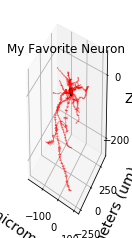

In [116]:
# planes: 'xy', 'xz', 'yz'
figure, axis = viewer.draw(neuron, mode='3d') # plane='zy'

# the axis handler is returend for further customization
axis.set_title('My Favorite Neuron')
axis.set_xlabel('micrometers (um)')
axis.set_ylabel('micrometers (um)')

(<matplotlib.figure.Figure at 0x7fc77a505250>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc778486610>)

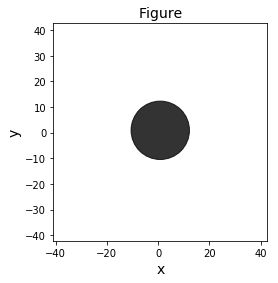

In [105]:
viewer.draw(neuron.soma, plane='xy')

And something for the adventurous.
To work with subplots and create more complex plots, we need to use lower level plot functions that reside in the view module

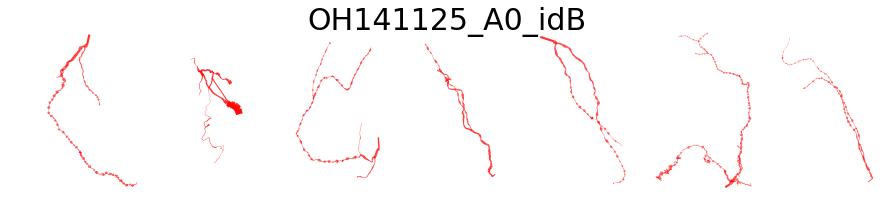

In [106]:
from neurom.view import view
from neurom.view.common import update_plot_limits

N = len(neurites)

# create N subplots, one for each neurite
f, axes = plt.subplots(1, N, figsize=(15, 3)) # figsize in inches (width, height)

for i, neurite in enumerate(neurites):
    current_axes = axes[i]
    
    # draw the neurite in the i-th subplot
    # new_fig set to False will prevent the creation of a new figure
    # every time the function is called. The one that we created above will be used instead
    view.plot_tree(current_axes, neurite, plane='xy')
    update_plot_limits(current_axes, white_space=10)
    # remove the xy axes for a prettier result
    current_axes.axis('off')

    # remove the title for each subplot
    current_axes.set_title('')

# set a global title for the figure
f.suptitle(neuron.name, fontsize=30)



# 3. Extract basic morphometrics (features)

There are two types of features, the neuron and neurite features.

Neurite features can be extracted from a single neurite, a list of neurites or a neuron.

Neuron features can only be extracted from a neuron, because some additional info is ussuale required (e.g. distance from soma).

All features can be called through the neurom.get function

In [107]:
help(nm.get)

Help on function get in module neurom.fst:

get(feature, obj, **kwargs)
    Obtain a feature from a set of morphology objects
    
    Parameters:
        feature(string): feature to extract
        obj: a neuron, population or neurite tree
        **kwargs: parameters to forward to underlying worker functions
    
    Returns:
        features as a 1D or 2D numpy array.
    
        
    Features:        
        Neurite features (neurite, neuron, neuron population):
            - local_bifurcation_angles:
                Get a list of local bifurcation angles in a collection of neurites
            - neurite_lengths:
                Get the path length per neurite in a collection
            - neurite_volume_density:
                Get the volume density per neurite
                
                    The volume density is defined as the ratio of the neurite volume and
                    the volume of the neurite's enclosung convex hull
            - neurite_volumes:
             

In [108]:
# extract section_lengths
section_lengths_neuron = nm.get('section_lengths', neuron)
print "Section lengths: \n", section_lengths_neuron[:10]

# Extract the local bifurcation angles
local_bif_angles = nm.get('local_bifurcation_angles', neuron)
print "Section local bifurcation angles: \n", local_bif_angles[:10]

Section lengths: 
[  23.06206881  137.56866558   27.96141378   73.95892443  454.03288849
   58.14366497    9.8047736    67.74098797   12.81388992    4.75540745]
Section local bifurcation angles: 
[ 1.15340968  1.93595938  0.59208089  1.19680533  1.05488478  0.80926095
  0.52879005  0.37842292  0.50203174  0.30036629]


In [109]:
try:
    # this must err because no soma is available
    nm.get('soma_radii', neuron.neurites)

except AttributeError:
    
    print "Soma was not found. Input object is wrong."


Soma was not found. Input object is wrong.


## Select Neurite Types

The previous examples treated all neurites in the same way. NeuroM allows you to extract morphometrics for a selected type of trees.

In [110]:
dir(nm.NeuriteType)

['__class__',
 '__doc__',
 '__members__',
 '__module__',
 'all',
 'apical_dendrite',
 'axon',
 'basal_dendrite',
 'soma',
 'undefined']

In [111]:
# Extract the section lengths of axonal trees
ax_section_lengths = nm.get('section_lengths', neuron, neurite_type=nm.NeuriteType.axon)

# Extract the section lengths of basal dendrite trees
ba_section_lengths = nm.get('section_lengths', neuron, neurite_type=nm.NeuriteType.basal_dendrite)

# Extract the section lengths of apical dendrite trees
ap_section_lengths = nm.get('section_lengths', neuron, neurite_type=nm.NeuriteType.apical_dendrite)

print '\naxonal ', ax_section_lengths
print '\nbasal  ', ba_section_lengths
print '\napical ', ap_section_lengths


axonal  []

basal   [  23.06206881  137.56866558   27.96141378   73.95892443  454.03288849
   58.14366497    9.8047736    67.74098797   12.81388992    4.75540745
    9.8106103    11.46251844   27.23817745   21.46937338  168.03223083
  127.21296277   53.85256444   28.44599043   31.25800203   46.9126318
   48.56517714   15.37494676   18.95028771   74.78267429   21.01373502
  166.84089711  231.34922762   21.46295958  508.73353846    0.86683332
    5.222992     61.24170599    7.08242448    3.37113184    8.58497862
    7.54859941   13.89949525    8.97682001   14.80310588   58.16398318
   52.58231967   12.10998204  355.98178939   37.92530459   39.07101227
   53.21623825   31.46711679   31.80065825    6.03920206    4.6874542
   23.99388158   38.06754806  172.54205162  259.7070512 ]

apical  []


## Let's plot the morphometrics

(<matplotlib.figure.Figure at 0x7fc777dc6190>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc777cded50>)

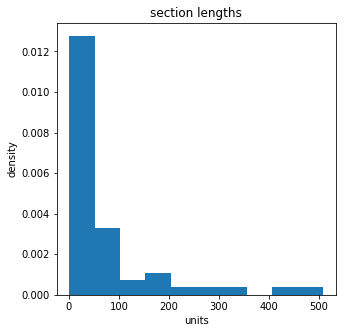

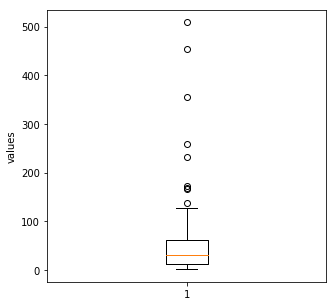

In [112]:
def histogram(values):
    """Generates a histogram in a new figure"""
    
    # create an image with one subplot
    f, ax = plt.subplots(1,1, figsize=(5,5))
    
    # create a histogram with specified bins and normalized
    ax.hist(values, bins=10, normed=True)
    
    ax.set_title(feature.replace('_', ' ')) # replace the underscores with spaces in the string
    
    ax.set_xlabel('units')
    ax.set_ylabel('density')
    
    return f, ax

def boxplot(data):
    '''Generates a boxplot in a new figure'''

    # create an image with one subplot
    f, ax = plt.subplots(1,1, figsize=(5,5))

    ax.boxplot(data) # plot boxplot
    
    ax.set_ylabel('values')

    return f, ax

feature =  'section_lengths'
values = nm.get(feature, neuron)

histogram(values)
boxplot(values)

# 4. Check Morphologies for errors

In [113]:

# the structural checks concern the valid structure of a morphology
# the neuron_checks are more specific to simulation
# options set the tolerance parameters for the checks
config = {
    'checks': {
        'structural_checks': [
            'is_single_tree',
            'has_valid_soma',
            'has_soma_points',
            'has_sequential_ids',
            'has_increasing_ids',
            'has_valid_neurites',
            'no_missing_parents',
            'has_all_finite_radius_neurites'
        ],
        'neuron_checks': [
            'has_axon',
            'has_basal_dendrite',
            'has_apical_dendrite',
            'has_no_jumps',
            'has_no_fat_ends',
            'has_nonzero_soma_radius',
            'has_all_nonzero_neurite_radii',
            'has_all_nonzero_section_lengths',
            'has_all_nonzero_segment_lengths',
        ]
    },
    'options': {
        'has_nonzero_soma_radius': 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    }
}

In [114]:
from neurom.check.runner import CheckRunner

# create a CheckRunner object by providing the configuration dict
check_runner = CheckRunner(config)

# run on a directory or a morphology
morphology_files = !ls ../morphologies/

results = check_runner.run('../morphologies/' + morphology_files[0])

for morph in results['files']:
    
    print "Morphology: {} \n".format(morph)
    
    checks_dict = results['files'][morph]
    
    # empty strings for our results
    passed = ""
    failed = ""
    
    # iterate over dictionary's items
    for check_name, status in checks_dict.items():
        
        # the string with the check's name and status
        string = "\t{0: <50} : {1}\n".format(check_name, status)
    
        # separate passed from failed checks
        if status is True:
            
            passed += string # concatenates to the current passed string
            
        else:
            
            failed += string # concatenats to the current failed string

    print passed
    print failed

Morphology: ../morphologies/2004-01-12-A.CNG.swc 

	Is single tree                                     : True
	Has valid soma                                     : True
	Has soma points                                    : True
	Has sequential ids                                 : True
	Has increasing ids                                 : True
	Has valid neurites                                 : True
	No missing parents                                 : True
	Has all finite radius neurites                     : True
	Has axon                                           : True
	Has basal dendrite                                 : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True

	Has